In [1]:
import des_functions as des
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from more_itertools import locate
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['cmr10']
plt.rcParams['mathtext.fontset'] ='cm'
plt.rc('axes', unicode_minus=False)

In [2]:
data_dir = '/home/b7009348/WGL_project/DES-data/'
mcal_file = 'y1_mcal_shapes_matched.fits'
im3_file = 'y1_im3_shapes_matched.fits'

In [25]:
with fits.open(data_dir+mcal_file) as hdu:
    data = hdu[1].data
    r11 = data['R11']
    r22 = data['R22']
    rsp_ids = data['coadd_objects_id']
    mcal_e1 = data['e1']
    mcal_e2 = data['e2']
    
with fits.open(data_dir+im3_file) as hdu:
    data = hdu[1].data
    im3_e1 = data['e1']
    im3_e2 = data['e2']
    im3_ids = data['coadd_objects_id']
    w = data['weight']
    m = data['m']
    
w_t = (r11+r22)
ones = np.ones(len(w))

In [11]:
def calc_bias(e1, e2, w, w_t):
    
    bias = abs(np.average(e1, weights=w_t)) + abs(np.average(e2, weights=w_t)) - abs(np.average(e1, weights=w)) - abs(np.average(e2, weights=w))
    
    return bias

In [24]:
bias = calc_bias(im3_e1, im3_e2, w, 2*ones)
print(bias)

9.733446956379868e-05


In [26]:
bias = calc_bias(im3_e1, im3_e2, w, w_t)
print('%e'%bias)

-1.950075e-04


Text(0.5, 0, '$\\theta$ (arcmin)')

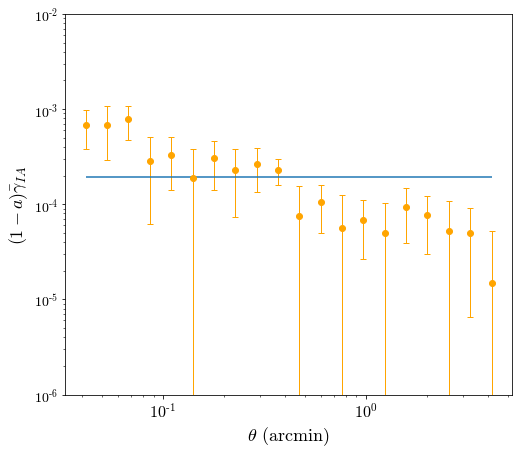

In [27]:
real_values = np.load(data_dir+'ia_full_values-bin_slop=0.npz')
jackknife_values = np.load(data_dir+'ia_jackknife_values-bin_slop=0.npz')
theta = np.logspace(np.log10(2.5), np.log10(250), 20) * 1.0/60

plt.figure(figsize=[8,7])
plt.errorbar(theta, real_values['IA'], yerr=np.sqrt(np.diag(jackknife_values['IA_cov'])), linewidth=0, marker='o', elinewidth=1, capsize=3, color='orange')
plt.hlines(y=abs(bias), xmin=np.min(theta), xmax=np.max(theta))
plt.xscale('log')
plt.yscale('log')
plt.ylim([1e-6, 1e-2])
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.ylabel(r'$(1-a)\bar{\gamma}_{IA}$', fontsize=18)
plt.xlabel(r'$\theta$ (arcmin)', fontsize=18)